# Webscraping with Python

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time

In [2]:
url = 'https://www.mlb.com/stats/'
adder = "?page="

In [3]:
df = pd.read_html(url)[0]
df

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,caret-upcaret-downOPS
0,1JuanJ SotoSotoLF1‌‌‌,WSH,47,154,39,54,14,0,13,37,41,28,6,2,0.351,0.490,0.695,1.185
1,2FreddieF FreemanFreeman1B2‌‌‌,ATL,60,214,51,73,23,1,13,53,45,37,2,0,0.341,0.462,0.640,1.102
2,3MarcellM OzunaOzunaDH3‌‌‌,ATL,60,228,38,77,14,0,18,56,38,60,0,0,0.338,0.431,0.636,1.067
3,4DJD LeMahieuLeMahieu2B4‌‌‌,NYY,50,195,41,71,10,2,10,27,18,21,3,0,0.364,0.421,0.590,1.011
4,5JoseJ RamírezRamirez3B5‌‌‌,CLE,58,219,45,64,16,1,17,46,31,43,10,3,0.292,0.386,0.607,0.993
5,6MikeM TroutTroutCF6‌‌‌,LAA,53,199,41,56,9,2,17,46,35,56,1,1,0.281,0.390,0.603,0.993
6,7DominicD SmithSmith1B7‌‌‌,NYM,50,177,27,56,21,1,10,42,14,45,0,0,0.316,0.377,0.616,0.993
7,8NelsonN CruzCruzDH8‌‌‌,MIN,53,185,33,56,6,0,16,33,25,58,0,0,0.303,0.397,0.595,0.992
8,9RonaldR AcuñaAcunaCF9‌‌‌,ATL,46,160,46,40,11,0,14,29,38,60,8,1,0.250,0.406,0.581,0.987
9,10JoseJ AbreuAbreu1B10‌‌‌,CWS,60,240,43,76,15,0,19,60,18,59,0,0,0.317,0.370,0.617,0.987


In [4]:
# Remove the numbers from the players name
df['PLAYER'] = df['PLAYER'].str.replace('\d+', '')
df

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,caret-upcaret-downOPS
0,JuanJ SotoSotoLF‌‌‌,WSH,47,154,39,54,14,0,13,37,41,28,6,2,0.351,0.490,0.695,1.185
1,FreddieF FreemanFreemanB‌‌‌,ATL,60,214,51,73,23,1,13,53,45,37,2,0,0.341,0.462,0.640,1.102
2,MarcellM OzunaOzunaDH‌‌‌,ATL,60,228,38,77,14,0,18,56,38,60,0,0,0.338,0.431,0.636,1.067
3,DJD LeMahieuLeMahieuB‌‌‌,NYY,50,195,41,71,10,2,10,27,18,21,3,0,0.364,0.421,0.590,1.011
4,JoseJ RamírezRamirezB‌‌‌,CLE,58,219,45,64,16,1,17,46,31,43,10,3,0.292,0.386,0.607,0.993
5,MikeM TroutTroutCF‌‌‌,LAA,53,199,41,56,9,2,17,46,35,56,1,1,0.281,0.390,0.603,0.993
6,DominicD SmithSmithB‌‌‌,NYM,50,177,27,56,21,1,10,42,14,45,0,0,0.316,0.377,0.616,0.993
7,NelsonN CruzCruzDH‌‌‌,MIN,53,185,33,56,6,0,16,33,25,58,0,0,0.303,0.397,0.595,0.992
8,RonaldR AcuñaAcunaCF‌‌‌,ATL,46,160,46,40,11,0,14,29,38,60,8,1,0.250,0.406,0.581,0.987
9,JoseJ AbreuAbreuB‌‌‌,CWS,60,240,43,76,15,0,19,60,18,59,0,0,0.317,0.370,0.617,0.987


In [5]:
def position_remover(string):
    "Extracts the Players Name"
    string = string.encode('ascii', 'ignore').decode("utf-8")
    if string[-2:].upper() == string[-2:]:
        return string[:-2]
    else:
        return string[:-1]
    
def position_extractor(string):
    """Extracts the players position"""
    string = string.encode('ascii', 'ignore').decode("utf-8")
    if string[-2:].upper() == string[-2:]:
        return string[-2:]
    else:
        return string[-1:]

In [6]:
df['PLAYER'].apply(position_remover)

0                   JuanJ SotoSoto
1          FreddieF FreemanFreeman
2              MarcellM OzunaOzuna
3             DJD LeMahieuLeMahieu
4              JoseJ RamrezRamirez
5                 MikeM TroutTrout
6              DominicD SmithSmith
7                 NelsonN CruzCruz
8                RonaldR AcuaAcuna
9                 JoseJ AbreuAbreu
10              TreaT TurnerTurner
11    MikeM YastrzemskiYastrzemski
12             BryceB HarperHarper
13                 WilW MyersMyers
14           MannyM MachadoMachado
15                  LukeL VoitVoit
16             CoreyC SeagerSeager
17    FernandoF Tatis Jr.Tatis Jr.
18              MookieM BettsBetts
19       MichaelM ConfortoConforto
20      TeoscarT HernndezHernandez
21               BrandonB LoweLowe
22           AnthonyA RendonRendon
23        GeorgeG SpringerSpringer
24             EloyE JimnezJimenez
Name: PLAYER, dtype: object

In [7]:
df['FIRSTNAME'] = df['PLAYER'].apply(position_remover).str.split().str[0].str[:-1]
df['FIRSTNAME']

0         Juan
1      Freddie
2      Marcell
3           DJ
4         Jose
5         Mike
6      Dominic
7       Nelson
8       Ronald
9         Jose
10        Trea
11        Mike
12       Bryce
13         Wil
14       Manny
15        Luke
16       Corey
17    Fernando
18      Mookie
19     Michael
20     Teoscar
21     Brandon
22     Anthony
23      George
24        Eloy
Name: FIRSTNAME, dtype: object

In [8]:
df['PLAYER'].apply(position_remover).str.split().str[1]

0                   SotoSoto
1             FreemanFreeman
2                 OzunaOzuna
3           LeMahieuLeMahieu
4              RamrezRamirez
5                 TroutTrout
6                 SmithSmith
7                   CruzCruz
8                  AcuaAcuna
9                 AbreuAbreu
10              TurnerTurner
11    YastrzemskiYastrzemski
12              HarperHarper
13                MyersMyers
14            MachadoMachado
15                  VoitVoit
16              SeagerSeager
17                     Tatis
18                BettsBetts
19          ConfortoConforto
20         HernndezHernandez
21                  LoweLowe
22              RendonRendon
23          SpringerSpringer
24             JimnezJimenez
Name: PLAYER, dtype: object

In [9]:
def last_name_deduplicator(string):
    """De-duplicates the players last name. Splits the string by capitalized letters and indexes the last value"""
    string = string.strip()
    return re.sub( r"([A-Z])", r" \1", string).split()[-1]

In [10]:
df['LASTNAME'] = df['PLAYER'].apply(position_remover).str.split().str[1].apply(last_name_deduplicator)

In [11]:
df['PLAYER'] = df['FIRSTNAME'] +" "+ df['LASTNAME']

In [12]:
df = df.drop(['FIRSTNAME','LASTNAME'], axis=1)

In [13]:
df

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,caret-upcaret-downOPS
0,Juan Soto,WSH,47,154,39,54,14,0,13,37,41,28,6,2,0.351,0.490,0.695,1.185
1,Freddie Freeman,ATL,60,214,51,73,23,1,13,53,45,37,2,0,0.341,0.462,0.640,1.102
2,Marcell Ozuna,ATL,60,228,38,77,14,0,18,56,38,60,0,0,0.338,0.431,0.636,1.067
3,DJ Mahieu,NYY,50,195,41,71,10,2,10,27,18,21,3,0,0.364,0.421,0.590,1.011
4,Jose Ramirez,CLE,58,219,45,64,16,1,17,46,31,43,10,3,0.292,0.386,0.607,0.993
5,Mike Trout,LAA,53,199,41,56,9,2,17,46,35,56,1,1,0.281,0.390,0.603,0.993
6,Dominic Smith,NYM,50,177,27,56,21,1,10,42,14,45,0,0,0.316,0.377,0.616,0.993
7,Nelson Cruz,MIN,53,185,33,56,6,0,16,33,25,58,0,0,0.303,0.397,0.595,0.992
8,Ronald Acuna,ATL,46,160,46,40,11,0,14,29,38,60,8,1,0.250,0.406,0.581,0.987
9,Jose Abreu,CWS,60,240,43,76,15,0,19,60,18,59,0,0,0.317,0.370,0.617,0.987


In [83]:
df = pd.DataFrame()
for i in range(1,53):
    
    # URL constructor
    # https://www.mlb.com/stats/2019?page=4&playerPool=ALL
    base = 'https://www.mlb.com/stats/'
    year = "2019"
    all_players= '&playerPool=ALL'
    page_num = "page=" + str(i) +""
    
    # Setting the base url
    url = base
    
    # Year Modifier
    if str(year) != "2020":
        url += year+"?"
        
    # Page Number
    if i > 1:
        url += page_num
    
    # All Player Data
    url += all_players
    print(url)
    
    # Pulling the data
    # Sometimes the table doesn't appear so we can make a while loop to ensure the data is collected for each page
    while True:
        temp = pd.read_html(url)[0]
        if temp.empty:
            time.sleep(5)
            continue
        else:
            break
    time.sleep(15)
    df = pd.concat([df,temp])
    
    
    
# Data Cleaning
df['PLAYER'] = df['PLAYER'].str.replace('\d+', '')
df['FIRSTNAME'] = df['PLAYER'].apply(position_remover).str.split().str[0].str[:-1]
df['LASTNAME'] = df['PLAYER'].apply(position_remover).str.split().str[1].apply(last_name_deduplicator)
df['PLAYER'] = df['FIRSTNAME'] +" "+ df['LASTNAME']
df = df.drop(['FIRSTNAME','LASTNAME'], axis=1)
df = df.reset_index()
df


https://www.mlb.com/stats/2019?&playerPool=ALL
https://www.mlb.com/stats/2019?page=2&playerPool=ALL
https://www.mlb.com/stats/2019?page=3&playerPool=ALL
https://www.mlb.com/stats/2019?page=4&playerPool=ALL
https://www.mlb.com/stats/2019?page=5&playerPool=ALL
https://www.mlb.com/stats/2019?page=6&playerPool=ALL
https://www.mlb.com/stats/2019?page=7&playerPool=ALL
https://www.mlb.com/stats/2019?page=8&playerPool=ALL
https://www.mlb.com/stats/2019?page=9&playerPool=ALL
https://www.mlb.com/stats/2019?page=10&playerPool=ALL
https://www.mlb.com/stats/2019?page=11&playerPool=ALL
https://www.mlb.com/stats/2019?page=12&playerPool=ALL
https://www.mlb.com/stats/2019?page=13&playerPool=ALL
https://www.mlb.com/stats/2019?page=14&playerPool=ALL
https://www.mlb.com/stats/2019?page=15&playerPool=ALL
https://www.mlb.com/stats/2019?page=16&playerPool=ALL
https://www.mlb.com/stats/2019?page=17&playerPool=ALL
https://www.mlb.com/stats/2019?page=18&playerPool=ALL


KeyboardInterrupt: 

In [85]:
df['PLAYER'] = df['PLAYER'].str.replace('\d+', '')
df['FIRSTNAME'] = df['PLAYER'].apply(position_remover).str.split().str[0].str[:-1]
df['LASTNAME'] = df['PLAYER'].apply(position_remover).str.split().str[1].apply(last_name_deduplicator)
df['PLAYER'] = df['FIRSTNAME'] +" "+ df['LASTNAME']
df = df.drop(['FIRSTNAME','LASTNAME'], axis=1)
df = df.reset_index()
df

,index,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,caret-upcaret-downOPS
0,0,R.J. Alaniz,CIN,8,1,0,1,0,0,0,1,0,0,0,0,1.000,1.000,1.000,2.000
1,1,John Brebbia,STL,63,1,1,1,0,0,0,0,0,0,0,0,1.000,1.000,1.000,2.000
2,2,Oliver Drake,TB,3,1,0,1,0,0,0,1,0,0,0,0,1.000,1.000,1.000,2.000
3,3,Francisco Liriano,PIT,67,1,0,1,0,0,0,0,1,0,0,0,1.000,1.000,1.000,2.000
4,4,Seth Lugo,NYM,57,1,0,1,0,0,0,1,0,0,0,0,1.000,1.000,1.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,20,Ben Zobrist,CHC,47,150,24,39,5,0,1,17,23,24,0,0,0.260,0.358,0.313,0.671
421,21,Tony Kemp,CHC,110,245,31,52,9,4,8,29,23,47,4,4,0.212,0.291,0.380,0.671
422,22,Andrew Knizner,STL,18,53,7,12,2,0,2,7,4,14,2,0,0.226,0.293,0.377,0.670
423,23,Matt Duffy,TB,46,147,12,37,8,0,1,12,19,29,0,1,0.252,0.343,0.327,0.670


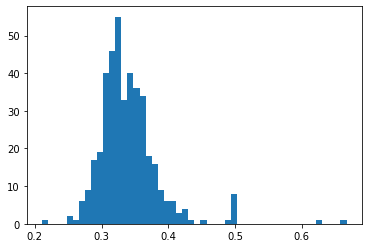

In [86]:
plt.hist(df[df['OBP'] != 1.0]['OBP'], bins=50);